<a href="https://colab.research.google.com/github/Bonjiang/datasci_5_statistics/blob/main/507_W5_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

### Chi-square Test

In [126]:
df = pd.read_csv('Order_and_Referring_10_11_2023.csv')
df

,NPI,LAST_NAME,FIRST_NAME,PARTB,DME,HHA,PMD
0,1558467555,.MCINDOE,THOMAS,Y,Y,Y,Y
1,1417051921,A BELLE,N,Y,Y,Y,Y
2,1972040137,A NOVOTNY,ELIZABETH,Y,Y,Y,Y
3,1760465553,A SATTAR,MUHAMMAD,Y,Y,Y,Y
4,1295400745,A'NEAL,BROGAN,Y,Y,N,N
...,...,...,...,...,...,...,...
1797999,1336502301,ZYZO,JOHN,Y,Y,Y,N
1798000,1225502768,ZZIWA,JACKIE,N,Y,N,Y
1798001,1124277249,ZZIWA-KABENGE,IRYNE,Y,Y,Y,Y
1798002,1033160296,ZZIWAMBAZZA,NATHAN,Y,Y,Y,Y


##### Null hypothesis is 'there is no association between HHA and DME'. Alternative hypothesis is 'there is a strong association between HHA and DME'.

In [127]:
df['HHA'].value_counts()

Y    1595021
N     202983
Name: HHA, dtype: int64

In [128]:
df['DME'].value_counts()

Y    1798003
N          1
Name: DME, dtype: int64

In [130]:
contingency_table = pd.crosstab(df['DME'], df['HHA'])
print(contingency_table)

HHA       N        Y
DME                 
N         1        0
Y    202982  1595021


In [131]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2 value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: {expected} ")

Chi2 value: 1.4962920196859804
P-value: 0.22124277788523478
Degrees of Freedom: 1
Expected Frequencies: [[1.12893520e-01 8.87106480e-01]
 [2.02982887e+05 1.59502011e+06]] 


##### The chi-square statistic value represents the strength of the association between the HHA and DME. In this case, the value was relatively small which suggests a weak association. The p-value is greater than 0.05 which is the typical significance level. Therefore, I failed to reject the null hypothesis and a significant association between HHA and DME is unlikely. I performed a chi-square test to analyze categorical data and examine the relationships between categorical variables, in this case HHA and DME. These tests are great for determining if two categorical variables are independent of each other. In this section, I observed a relatively large p-value and a relatively low chi-square value. I have one degree of freedom.


###T-test

In [132]:
df = pd.read_csv('CC_WWDSE_Cond.csv')
df

,Bene_Geo_Lvl,Bene_Geo_Desc,Bene_Geo_Cd,Bene_Age_Lvl,Bene_Demo_Lvl,Bene_Demo_Desc,Bene_Cond,Prvlnc,Tot_Mdcr_Stdzd_Pymt_PC,Tot_Mdcr_Pymt_PC,Hosp_Readmsn_Rate,ER_Visits_Per_1000_Benes,is_southern
0,State,Alabama,1.0,All,All,All,Alcohol Abuse,0.0188,25102.3405,23348.6039,0.2413,2184.7557,southern
1,State,Alabama,1.0,All,All,All,Alzheimer's Disease/Dementia,0.1140,25051.8813,22554.0576,0.2119,1410.8355,southern
2,State,Alabama,1.0,All,All,All,Arthritis,0.3897,15827.4930,14403.5780,0.1775,998.3314,southern
3,State,Alabama,1.0,All,All,All,Asthma,0.0499,20560.6948,18914.5834,0.2117,1614.4483,southern
4,State,Alabama,1.0,All,All,All,Atrial Fibrillation,0.0793,25450.4587,23414.3381,0.2268,1450.9822,southern
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,State,Wyoming,56.0,All,All,All,Hypertension,0.4038,14596.5257,16604.1539,0.1563,1032.4567,non-southern
1047,State,Wyoming,56.0,All,All,All,Ischemic Heart Disease,0.2010,17492.8555,20113.1132,0.1772,1248.6805,non-southern
1048,State,Wyoming,56.0,All,All,All,Osteoporosis,0.0480,19099.8147,21672.1663,0.1684,1137.0338,non-southern
1049,State,Wyoming,56.0,All,All,All,Schizophrenia and Other Psychotic Disorders,0.0154,16458.9524,18485.6017,0.2006,2171.5057,non-southern


##### Null hypothesis is 'there is not a significant difference in the mean prevalence of COPD between southern and non-southern states'. Alternative hypothesis is 'there is a significant difference in the mean prevalence of COPD between southern and non-southern states'.

In [133]:
df['is_southern'] = df['Bene_Geo_Desc'].apply(lambda x: 'southern' if x in ['Alabama',
        'Arkansas', 'Delaware', 'District of Columbia', 'Florida', 'Georgia',
        'Kentucky', 'Louisiana', 'Maryland', 'Mississippi', 'North Carolina',
        'Oklahoma', 'South Carolina', 'Tennessee', 'Texas', 'Virginia',
        'West Virginia'] else 'non-southern')

In [151]:
COPD_data = df[df['Bene_Cond'] == 'COPD']
COPD_data [:10]

,Bene_Geo_Lvl,Bene_Geo_Desc,Bene_Geo_Cd,Bene_Age_Lvl,Bene_Demo_Lvl,Bene_Demo_Desc,Bene_Cond,Prvlnc,Tot_Mdcr_Stdzd_Pymt_PC,Tot_Mdcr_Pymt_PC,Hosp_Readmsn_Rate,ER_Visits_Per_1000_Benes,is_southern
6,State,Alabama,1.0,All,All,All,COPD,0.1375,24579.4174,22509.9589,0.2237,1622.4625,southern
26,State,Alaska,2.0,All,All,All,COPD,0.0823,21806.0478,31218.5925,0.1985,1752.3659,non-southern
46,State,Arizona,4.0,All,All,All,COPD,0.0946,23552.3566,25271.8361,0.2116,1504.2771,non-southern
67,State,Arkansas,5.0,All,All,All,COPD,0.1250,24511.4580,22968.8683,0.2236,1714.1633,southern
88,State,California,6.0,All,All,All,COPD,0.0952,27690.4636,35449.9754,0.2500,1780.8407,non-southern
109,State,Colorado,8.0,All,All,All,COPD,0.0937,22400.3647,23982.7714,0.1940,1589.6774,non-southern
130,State,Connecticut,9.0,All,All,All,COPD,0.1134,25745.2732,31157.1304,0.2451,1868.7806,non-southern
151,State,Delaware,10.0,All,All,All,COPD,0.1051,23731.9796,26543.8500,0.2320,1562.1685,southern
171,State,District of Columbia,11.0,All,All,All,COPD,0.0777,31290.9327,38269.8154,0.2905,2446.0276,southern
192,State,Florida,12.0,All,All,All,COPD,0.1346,27393.8477,27452.2509,0.2448,1597.6510,southern


In [135]:
southern_data = COPD_data[COPD_data['is_southern'] == 'southern']['Prvlnc']
southern_data

6      0.1375
67     0.1250
151    0.1051
171    0.0777
192    0.1346
213    0.1174
356    0.1696
377    0.1243
418    0.1023
502    0.1258
688    0.1197
749    0.1463
832    0.1061
873    0.1317
894    0.1115
954    0.1056
996    0.1755
Name: Prvlnc, dtype: float64

In [136]:
non_southern_data = COPD_data[COPD_data['is_southern'] == 'non-southern']['Prvlnc']
non_southern_data

26      0.0823
46      0.0946
88      0.0952
109     0.0937
130     0.1134
233     0.0658
252     0.0886
272     0.1183
293     0.1426
314     0.1093
335     0.1190
398     0.1250
439     0.1081
460     0.1418
481     0.0833
523     0.1369
543     0.0950
563     0.1079
584     0.1132
605     0.1032
625     0.1096
646     0.0884
667     0.1105
708     0.1010
728     0.1319
770     0.0899
791     0.1102
811     0.1132
852     0.1043
914     0.0661
934     0.0964
975     0.0849
1017    0.0923
1037    0.1053
Name: Prvlnc, dtype: float64

In [137]:
t_stat, p_val = ttest_ind(southern_data, non_southern_data, equal_var=False)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: 3.0292324746381074
P-value: 0.005517671200077825


In [138]:
southern_mean = southern_data.mean()
non_southern_mean = non_southern_data.mean()

print(f"Mean prevalence for southern states: {southern_mean}")
print(f"Mean prevalence for non-southern states: {non_southern_mean}")

Mean prevalence for southern states: 0.12445294117647059
Mean prevalence for non-southern states: 0.10415294117647059


##### The T-statistic measures the difference between the means of two groups that are relative to the variation within each group. In this case, there is a postive T-statistic which indicates that there is a difference in means and it suggests that the COPD mean of the first group (southern) is larger than the mean of the second group (non southern). The p-value suggests that the difference observed is statistically significant as it is less than 0.05, overall suggesting that the means of these groups are different. **The below mean prevalence code confirms this.** I performed a T-test to compare group means and test my hypothesis. It is also a form of quality control. After performing this t-test, I later confirmed it with determining actual mean prevalence values. I observed a higher mean prevalence for southern states.


### ANOVA

In [139]:
df3 = pd.read_csv('musicsurvey_results.csv')
df3

,Primary streaming service,BPM
0,Spotify,156.0
1,Pandora,119.0
2,Spotify,132.0
3,YouTube Music,84.0
4,Spotify,107.0
...,...,...
731,Spotify,120.0
732,Spotify,160.0
733,Other streaming service,120.0
734,Spotify,170.0


Null hypothesis is 'There is not a significant difference of BPM values across participants among different primary streaming service type'. Alternative hypothesis is 'There is a significant difference of BPM values across participants among different primary streaming service type'.

In [140]:
df3.columns = df3.columns.str.replace(' ', '_').str.replace('/', '_').str.replace('(', '').str.replace(')', '').str.lower()

<ipython-input-140-47daf7969f11>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df3.columns = df3.columns.str.replace(' ', '_').str.replace('/', '_').str.replace('(', '').str.replace(')', '').str.lower()
<ipython-input-140-47daf7969f11>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df3.columns = df3.columns.str.replace(' ', '_').str.replace('/', '_').str.replace('(', '').str.replace(')', '').str.lower()


In [141]:
df3.columns

Index(['primary_streaming_service', 'bpm'], dtype='object')

In [142]:
model = ols('bpm ~ C(primary_streaming_service)', data=df3).fit()
model

In [143]:
anova_table = sm.stats.anova_lm(model)
print(anova_table)

                                 df        sum_sq       mean_sq         F  \
C(primary_streaming_service)    5.0  8.952059e+14  1.790412e+14  0.111641   
Residual                      622.0  9.975122e+17  1.603717e+15       NaN   

                                PR(>F)  
C(primary_streaming_service)  0.989791  
Residual                           NaN  


I performed the ANOVA test to analyze the differences among group means in a dataset and to test if I can reject my null hypothesis. In this case, there is a very high p-value which indicates that there is no significant different among the primary streaming services in terms of beats per minute. Therefore, I fail to reject the null hypothesis. There is no evidence of a significant effect of primary streaming service type on beats per minute.

### Regression Analysis

In [95]:
df4 = pd.read_csv('musicsurveryreg_results.csv')
df4

,Hours per day,BPM
0,3.0,156.0
1,1.5,119.0
2,4.0,132.0
3,2.5,84.0
4,4.0,107.0
...,...,...
731,2.0,120.0
732,1.0,160.0
733,6.0,120.0
734,5.0,170.0


In [117]:
df4.dropna(inplace=True)
df4

,hours_per_day,bpm
0,3.0,156.0
1,1.5,119.0
2,4.0,132.0
3,2.5,84.0
4,4.0,107.0
...,...,...
731,2.0,120.0
732,1.0,160.0
733,6.0,120.0
734,5.0,170.0


##### Null hypothesis is 'There is no significant linear relationship between number of hours per day spent on music streaming and beats per minute'. Alternative hypothesis is 'There is a significant linear relationship between number of hours per day spent on music streaming and beats per minute'.

In [118]:
df4.columns = df4.columns.str.replace(' ', '_').str.replace('/', '_').str.replace('(', '').str.replace(')', '').str.lower()

<ipython-input-118-a488b62ee5e9>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df4.columns = df4.columns.str.replace(' ', '_').str.replace('/', '_').str.replace('(', '').str.replace(')', '').str.lower()
<ipython-input-118-a488b62ee5e9>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df4.columns = df4.columns.str.replace(' ', '_').str.replace('/', '_').str.replace('(', '').str.replace(')', '').str.lower()


In [144]:
df4.columns

Index(['hours_per_day', 'bpm'], dtype='object')

In [145]:
X = df4['hours_per_day']
Y = df4['bpm']

In [146]:
X = sm.add_constant(X)

In [147]:
model = sm.OLS(Y, X).fit()

In [123]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    bpm   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.137
Date:                Sat, 14 Oct 2023   Prob (F-statistic):              0.287
Time:                        17:06:32   Log-Likelihood:                -11900.
No. Observations:                 629   AIC:                         2.380e+04
Df Residuals:                     627   BIC:                         2.381e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.499e+05   2.49e+06     -0.181

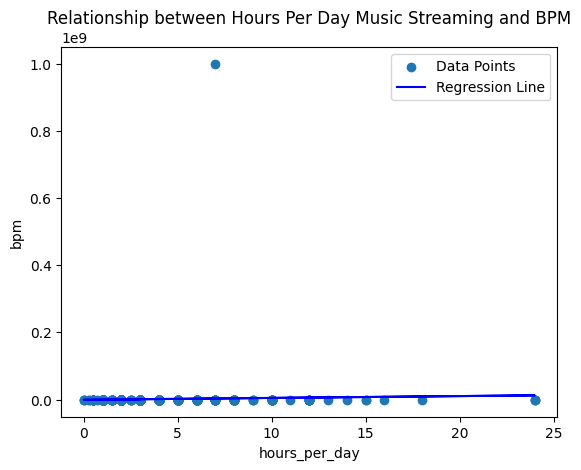

In [124]:
plt.scatter(df4['hours_per_day'], df4['bpm'], label='Data Points')
plt.plot(df4['hours_per_day'], model.predict(X), color='blue', label='Regression Line')
plt.xlabel('hours_per_day')
plt.ylabel('bpm')
plt.title('Relationship between Hours Per Day Music Streaming and BPM')
plt.legend()
plt.show()

##### I performed a regression analysis to test my hypothesis about relationships between my two numerical variables and to explore trends and patterns in the data. In this case, my R-squared value of 0.002 suggests that there is a very weak linear relationship between my variables and the variance is mostly left unexplained. My p-value is 0.287 which suggests that thge model is not statisically significant as it is high. Based on these results, I fail to reject my null hypothesis.